# Chamada de Bibliotecas e Inicialização dos Dataframes

### Importando Bibliotecas

In [85]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

### Inicializando Dataframes

In [101]:
df_result1 = pd.read_csv('datasets/project_sql_result_01.csv')
df_result4 = pd.read_csv('datasets/project_sql_result_04.csv')
df_result7 = pd.read_csv('datasets/project_sql_result_07.csv')

In [102]:
df_result1.info()
df_result1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [88]:
df_result4.info()
df_result4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [89]:
df_result7.info()
df_result7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<span style='color:red'> Dataframes inicializados com sucesso, a primeiro momento não parece ter nada de errado com dados ausentes, em relação ao tipo de dados df_result1 trips_amount, df_result04 average_trips e df_result7 duration_seconds deveriam ser inteiros, além disso start_ts deve ser convertido em date. Existe um argumento pra converter weather_conditions, company_name e dropoff_location_name para category mas no momento não vejo necessidade.

# Preparando os Dados

### Verificando existencia de duplicatas e dados ausentes

In [90]:
d1 = df_result1.duplicated().sum()
d4 = df_result4.duplicated().sum()
d7 = df_result7.duplicated().sum()
print(f"d1: {d1}\nd4: {d4}\nd7: {d7}")

a1 = df_result1.isna().sum()
a4 = df_result4.isna().sum()
a7 = df_result7.isna().sum()
print(f"a1:\n{a1}\na4:\n{a4}\na7:\n{a7}")

d1: 0
d4: 0
d7: 197
a1:
company_name    0
trips_amount    0
dtype: int64
a4:
dropoff_location_name    0
average_trips            0
dtype: int64
a7:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [91]:
df_result7.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


<span style='color:red'> Tudo parece ok com exceção do df_result7, duas coisas a serem levantadas, as duplicatas do dataframe parecem ser válidas e devem ser mantidas, considerando que grande parte das viagens tem duração entrew 2000-2500 segundos e não tem tanta variedade de datas, estandando todas em novembro além do weather poder ser só 'good' ou 'bad' a chance de 2 linhas iguais é relativamente alta. A segunda observação é que existem viagens com duração de 0 segundos, o que não deveria acontecer, portanto esses valores serão tratados como ausentes e as linhas serão removidas do dataframe já que uma viagem de 0 segundos nunca aconteceu.

### Enriquecendo os dados

In [92]:
df_result1['trips_amount'] = df_result1['trips_amount'].astype(int)
df_result4['average_trips'] = df_result4['average_trips'].astype(int) # Truncação proposital
df_result7['duration_seconds'] = df_result7['duration_seconds'].astype(int)
df_result7['start_ts'] = pd.to_datetime(df_result7['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [93]:
df_result7.drop(df_result7[df_result7['duration_seconds'] == 0].index, inplace=True)
df_result7.reset_index(drop=True, inplace=True)

In [94]:
df_result1.info()
df_result1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 900.0+ bytes


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [95]:
df_result4.info()
df_result4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [96]:
df_result7.info()
df_result7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 20.9+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


<span style='color:red'> Todos os dados foram enriquecidos e os dataframes estão prontos para análise

# Analisando os Dados

### 10 Principais bairros em termos de destinos

In [97]:
df_result4.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


### Gráfico de Empresas de táxi e número de corridas

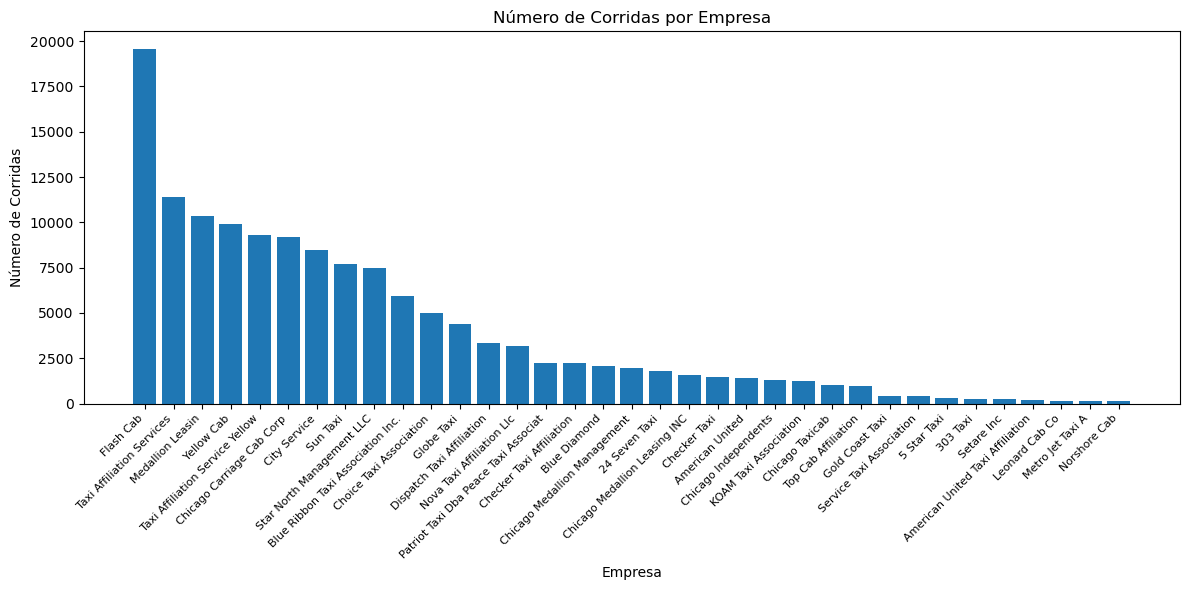

In [98]:
df_plot = df_result1[df_result1['trips_amount'] > 100] # Somente empresas com mais de 100 corridas

plt.figure(figsize=(12,6))
plt.bar(df_plot['company_name'], df_plot['trips_amount'])
plt.title('Número de Corridas por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

<span style='color:red'> É possível observar pelo gráfico uma dominancia no mercado pela empresa Flash Cab enquanto as outras tendem a possuir um número de corridas um pouco maior que a antecessora na ordem até chegar em Top Cab Affiliation onde temos outra queda grande.

### Gráfico de top 10 bairros por número de corridas com bairro como destino

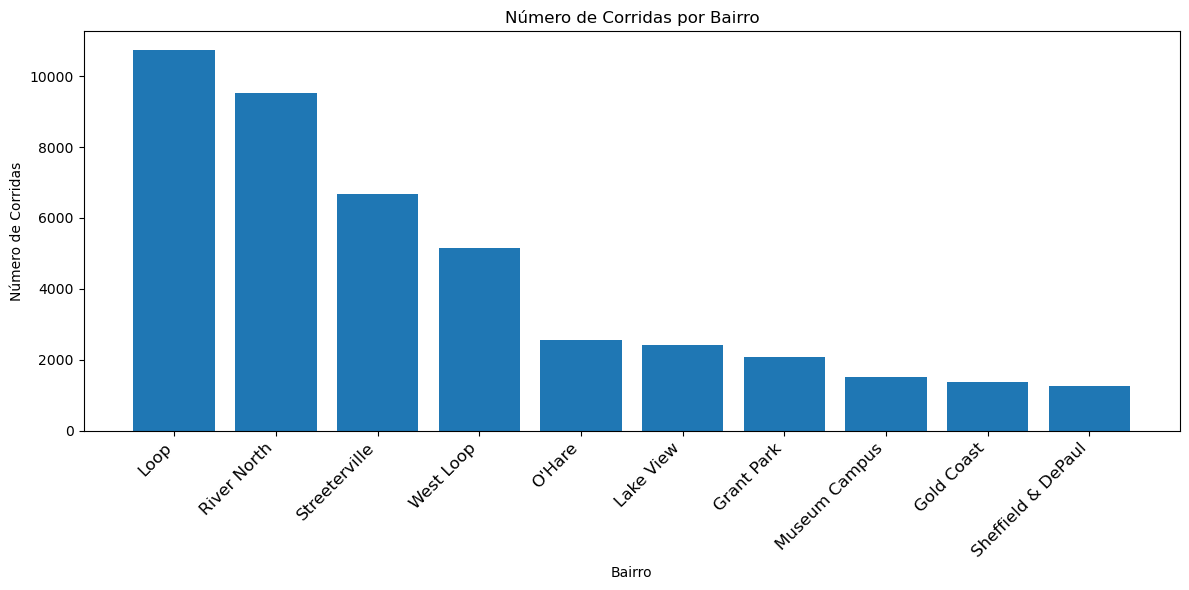

In [99]:
df_plot = df_result4.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(df_plot['dropoff_location_name'], df_plot['average_trips'])
plt.title('Número de Corridas por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

<span style='color:red'> Os bairros Loop, River North, Streetville e West Loop parecem ser os mais movimentados com uma quantidade maior que os demais, em especial Loop e River North possuem uma quantidade mais destacada que os outros 2.

# Testando Hipóteses

### Hipótese: A duração dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos

Hipótese nula: A duração dos passeios é a mesma tanto em dias bons como dias ruins. Valor alpha = 0.05, usaremos o teste de medição de igualdade entre as médias.

In [100]:
good = np.array(df_result7[df_result7['weather_conditions'] == 'Good']['duration_seconds'])
bad = np.array(df_result7[df_result7['weather_conditions'] == 'Bad']['duration_seconds'])

alpha = 0.05

results = st.ttest_ind(good,bad)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  1.3318772977743245e-11
Rejeitamos a hipótese nula


<span style='color:red'> O resultado nos mostra que é viável rejeitarmos a hipótese nula, de fato há uma diferença entre a duração da corrida nos dias chuvosos e nos dias sem chuva.